# Business Case: Axis Bank
Axis bank is trying to categorize its customers for better advertising their credit card service and have more number of customers rolling for the service. The Data Science team has been tasked to classify the customers based on their expenditures, family size, age, and marital status.

The column profile looks as follows,

| id | features | description |
| :-: | :-: | :-: |
|01| ID | ID of the Customer |
|02| Gender | Customer is a Male or Female |
|03| Ever_Married | Customer is married or not |
|04| Age | Age of the Customer |
|05| Graduated | Customer has graduated or not |
|06| Profession | Profession of Customer |
|07| Work_Experience | Work Exp of Customer, ranges from (0 - 14) |
|08| Spending_Score | Customer Expenditure scores |
|09| Family_Size | Family size of the Customer, ranges from (1 - 9) |
|10| Var_1 | Categorizing Customers as (Cat_1, Cat_2, Cat_3, Cat_4) |
|11| Segmentation | Categorizing Customers as (A, B, C, D) |

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
# loading the dataset
df = pd.read_csv("axis_bank.csv")
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


Observe that `Segmentation` and `Var_1` say the same thing, hence, either one of them can be dropped.

In [3]:
# dropping "ID" and "Var_1"
df.drop(columns = ["ID", "Var_1"], inplace = True)
df.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation
0,Male,No,22,No,Healthcare,1.0,Low,4.0,D
1,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,A
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,B
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,B
4,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,A


In [4]:
df.isna().sum()

Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Segmentation         0
dtype: int64

Observe that there are null values present in the dataset.

In [5]:
# dropping all the null values
df.dropna(inplace = True)
df.isna().sum()

Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Segmentation       0
dtype: int64

In [6]:
# shape of the data after all the above manipulations
df.shape

(6718, 9)

# EDA

In [7]:
# checking for categorical columns in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6718 entries, 0 to 8067
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           6718 non-null   object 
 1   Ever_Married     6718 non-null   object 
 2   Age              6718 non-null   int64  
 3   Graduated        6718 non-null   object 
 4   Profession       6718 non-null   object 
 5   Work_Experience  6718 non-null   float64
 6   Spending_Score   6718 non-null   object 
 7   Family_Size      6718 non-null   float64
 8   Segmentation     6718 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 524.8+ KB


The categorical columns are,
- Gender
- Ever_married
- Graduated
- Profession
- Spending_Score
- Segmentation

In [8]:
for i in df.columns:
    print(f"Column Name: {i}, Number of unique elements: {df[i].nunique()}")
    print()

Column Name: Gender, Number of unique elements: 2

Column Name: Ever_Married, Number of unique elements: 2

Column Name: Age, Number of unique elements: 67

Column Name: Graduated, Number of unique elements: 2

Column Name: Profession, Number of unique elements: 9

Column Name: Work_Experience, Number of unique elements: 15

Column Name: Spending_Score, Number of unique elements: 3

Column Name: Family_Size, Number of unique elements: 9

Column Name: Segmentation, Number of unique elements: 4



### Which encoding technique to use to encode the target variable `Segmentation`?
One Hot Encoding the target variable would be the best way to go.

Also, since it is a multi-class classification problem, `CategoricalCrossentropy` will be used as the loss function.

In [9]:
# storing the class labels
class_labels = df["Segmentation"]
df = pd.get_dummies(df, columns = ["Segmentation"], dtype = "int16")
df.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation_A,Segmentation_B,Segmentation_C,Segmentation_D
0,Male,No,22,No,Healthcare,1.0,Low,4.0,0,0,0,1
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,0,1,0,0
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,0,1,0,0
5,Male,Yes,56,No,Artist,0.0,Average,2.0,0,0,1,0
6,Male,No,32,Yes,Healthcare,1.0,Low,3.0,0,0,1,0


### How to encode the remaining categorical features?
Any of the encoding techniques can be applied. In this instance, OHE is applied.

In [10]:
# separating the features and label
x = df.drop(columns = ["Segmentation_A", "Segmentation_B", "Segmentation_C", "Segmentation_D"])
y = df[["Segmentation_A", "Segmentation_B", "Segmentation_C", "Segmentation_D"]]
x = pd.get_dummies(x, columns = ["Gender", "Ever_Married", "Graduated", "Profession", "Spending_Score"], dtype = "int16")
pd.set_option('display.max_columns', None)
x.head()

,Age,Work_Experience,Family_Size,Gender_Female,Gender_Male,Ever_Married_No,Ever_Married_Yes,Graduated_No,Graduated_Yes,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Spending_Score_Average,Spending_Score_High,Spending_Score_Low
0,22,1.0,4.0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
2,67,1.0,1.0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1
3,67,0.0,2.0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0
5,56,0.0,2.0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0
6,32,1.0,3.0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1


In [11]:
# splitting the dataset into train, validation and test set
from sklearn.model_selection import train_test_split

x_train_val, x_test, y_train_val, y_test = train_test_split(x, y, test_size = 0.1, random_state = 42)
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size = 0.1, random_state = 42)
x_train.shape, y_train.shape, x_val.shape, y_val.shape, x_test.shape, y_test.shape

((5441, 21), (5441, 4), (605, 21), (605, 4), (672, 21), (672, 4))

Observe that 10% of the data is used for validation and testing, the remaining data is used for training.

Also, note that, standardizing the data is important because it helps the algorithm reach the global minima faster.

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)
x_test = scaler.transform(x_test)

# Baseline Model
The model has the following 6 layers,

| layer | description |
| :-: | :-: |
| L1 | Input Layer |
| L2 | Contains 64 Neurons |
| L3 | Contains 32 Neurons |
| L4 | Contains 16 Neurons |
| L5 | Contains 8 Neurons |
| L6 | Output Layer |

ReLU is used as the activation function.

In [13]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# setting the seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

In [14]:
def baseline_model():
    model = Sequential(
        [
            Dense(64, activation = "relu", kernel_initializer = "glorot_uniform"),
            Dense(32, activation = "relu", kernel_initializer = "glorot_uniform"),
            Dense(16, activation = "relu", kernel_initializer = "glorot_uniform"),
            Dense(8, activation = "relu", kernel_initializer = "glorot_uniform"),
            Dense(4, activation = "sigmoid")
        ]
    )

    return model

model = baseline_model()

`Adam` is used as the optimizer and Precision and Recall are used as metrics (Accuracy is not the correct metric to be used for multi-class classification problem).

In [15]:
model.compile(optimizer = tf.keras.optimizers.Adam(), loss = tf.keras.losses.CategoricalCrossentropy(), metrics = ["precision", "recall"])

# training the model "epochs = 10" and "batch_size = 128"
history = model.fit(x_train, y_train, validation_data = (x_val, y_val), epochs = 10, batch_size = 128, verbose = 0)

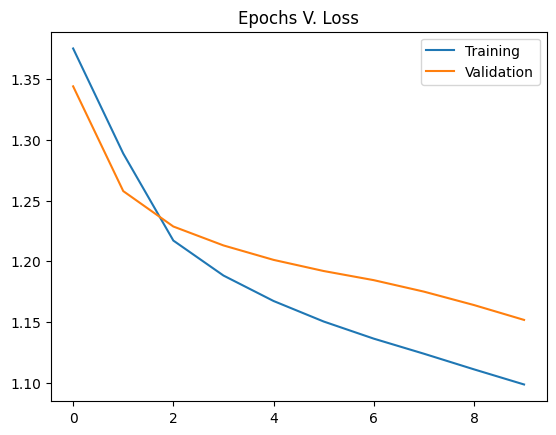

In [16]:
epochs = history.epoch
loss = history.history["loss"]
val_loss = history.history["val_loss"]
plt.plot(epochs, loss, label = "Training")
plt.plot(epochs, val_loss, label = "Validation")
plt.legend()
plt.title("Epochs V. Loss")
plt.show()

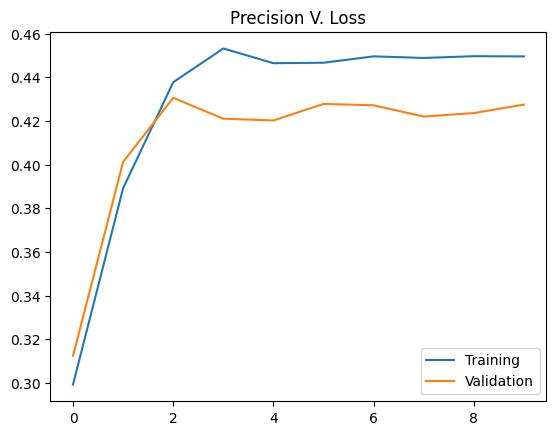

In [17]:
epochs = history.epoch
precision = history.history["precision"]
val_precision = history.history["val_precision"]
plt.plot(epochs, precision, label = "Training")
plt.plot(epochs, val_precision, label = "Validation")
plt.legend()
plt.title("Precision V. Loss")
plt.show()

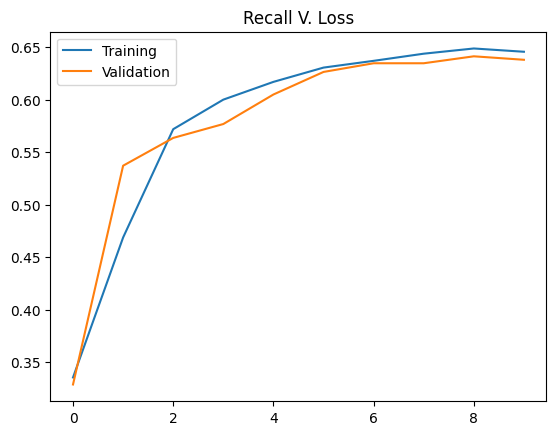

In [18]:
epochs = history.epoch
recall = history.history["recall"]
val_recall = history.history["val_recall"]
plt.plot(epochs, recall, label = "Training")
plt.plot(epochs, val_recall, label = "Validation")
plt.legend()
plt.title("Recall V. Loss")
plt.show()

Observe that after 10 epochs, the model still has high loss. Precision is around 44% and Recall is around 72%.

# Orthogonalization
### What all can be done to get the model to perform better?
The following is a list of things that can be done to improve the model's performance,
- Increase the number of epochs.
- Increase the number of layers.
- Add Regularization (L2).
- Batch Normalization.
- Dropout
- Decrease the Learning Rate.
- Choose a different Optimizer or Loss Function.
- Collect more data.

As all of the above increase performance, it is important to know which one to use in order to achieve the desired results, else a lot of time will be spent on experiments.

This process of knowing what to tune in order to achieve one effect is called Orthogonalization.

### What to tweak when the Neural Network has bad training Accuracy?
Neural Network is underfitting. In such a case,
- Increase the number of epochs.
- Try a different optimizer (preferrably Adam).
- Increase the number of layers.
- Collect more data.

### What to tweak when the Neural Network has bad validation Accuracy?
Neural Network is overfitting. In such cases,
- Use a simpler Neural Network (lesser number of layers).
- Add Regularization.
- Batch Normalization.
- Dropout.
- Use bigger training data with diverse samples.

### What is diverse samples in training data?
The new samples should be completely different from the original training set.

### What to tweak when the test Accuracy is bad (the model fits well on training and validation data but performs poorly in the test data)?
The chances of this happening are low, but if this does happen,
- Increase the size of the validation data.
- Choose a different Loss Function for the model.

### Why getting more data shouldn't be the go to thing?
The following are the reasons,
- Some data is hard to get.
- Collecting data is time intensive.
- Sometimes, months can be spent over collecting the data, yet the model's performance barely or does not increase.

### What are the main hyperparameters to look for when using a Neural Network?
The main hyperparameters to tune in a Neural Network,
- Learning rate ($\alpha$).
- $\beta$ value of the Gradient Descent with Momentum.
- $\beta_1$, $\beta_2$, $\epsilon$ when using Adam.
- Number of layers.
- Number of Neurons or hidden units to be used.
- Learning rate decay.
- Batch size.

### Among the above mentioned hyperparameter, which ones to tune first?
1. Learning Rate ($\alpha$): This is because, most of the times, due to an incorrect $\alpha$ the model fails to reach global minima.
2. $\beta$ value of the Gradient Descent with Momentum: The value of 0.9 (default) is a good value.
3. Number of Neurons or hidden units to be used: This helps in making the model more complex.
4. Batch size: A right batch size should be found such that there is equal distribution of data in every epoch.
5. Number of layers: Changing the number of layers, changes the Neural Network entirely. Hence, this should be one of the last hyperparameter that should be considered to tune.
6. Learning rate decay: If after getting the best learning rate, the model still does not perform well. It is a good practive to perform a decay of the learning rate over epochs.
7. $\beta_1$, $\beta_2$, $\epsilon$ when using Adam: Though these are not recommended to be tuned, but sometimes tuning them would help the model to converge to the global minima.

### How to find the best values of various hyperparameters?
`GridSearchCV`.

### If there are N hyperparameters, will `GridSearchCV` be the right approach then?
No, as the number of hyperparameters increase, the time taken by `GridSearchCV` also increases. Hence, `RandomSearchCV` would be a better approach in this case.

Once `RandomSearchCV` is performed, select the region or area of the best hyperparameter and `GridSearchCV` can be performed on this selected region. This way helps in getting a good approximation of the best hyperparameters before `GridSearchCV` is performed.

# Gradient Checking

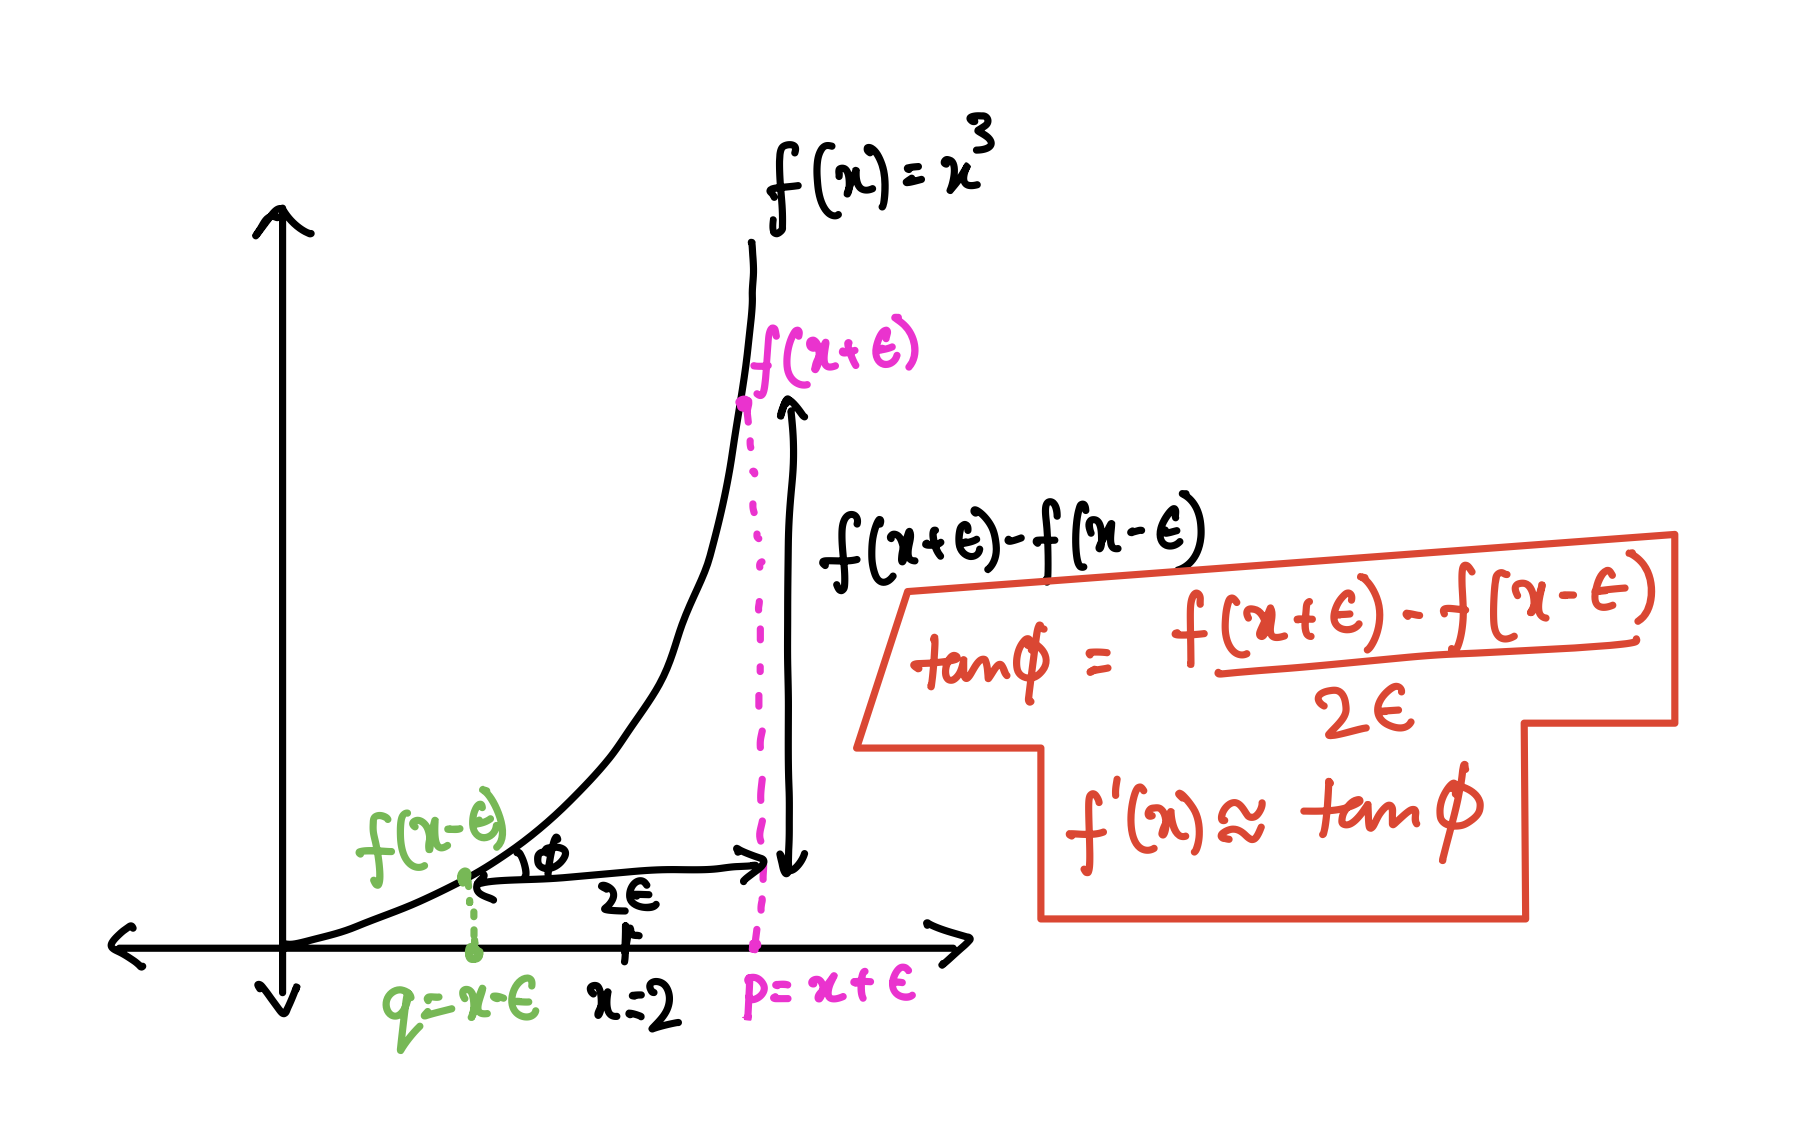

The major problems with Neural Networks is that it is black box interpretation.

### Why is it that sometimes even after a series of correct hyperparameters, the Neural Network does not perform well?
This is due to gradient and backpropagation not performing correctly. It can happen due to some bug or issue in gradient calculation.

### How to check of the gradients from backpropagation are correct?
To verify the correctness of backpropagation, the calculated gradient can be compared with approximations of the true gradients.

### How to calculate approximate gradient value?
Consider that there is a function, $f(x) = x^3$, and the plot of it looks like the one shown in the above image. Now, if 2 points $p$ and $q$ are taken from a point $x = 2$, such that,
- $p = x + \epsilon$. Where, $\epsilon = 0.01$
- $q = x - \epsilon$. Where, $\epsilon = 0.01$

Consider the triangle created by the points $p$ and $q$,
- The base of the triangle is, $p - q = x + \epsilon - x - \epsilon = 2\epsilon$.
- The height of the triangle becomes, $f(p) - f(q) = f(x + \epsilon) - f(x - \epsilon)$.

Recall from Calculus that the derivative of a function $f'(x) = \tan$ of the triangle created by the points on the function is $\tan = \frac{f(x + \epsilon) - f(x - \epsilon)}{2\epsilon}$.

The value of $\tan$ becomes, $\tan = \frac{2.01^3 - 1.99^3}{2 * 0.01} = \frac{8.120601 - 7.880599}{0.02} = 12.001$.

The derivative of $f(x)$ is, $f'(x) = 3x^2 = 3(2)^2 = 12$.

Hence, $\frac{f(x + \epsilon) - f(x - \epsilon)}{2\epsilon} ≈ f'(x)$.

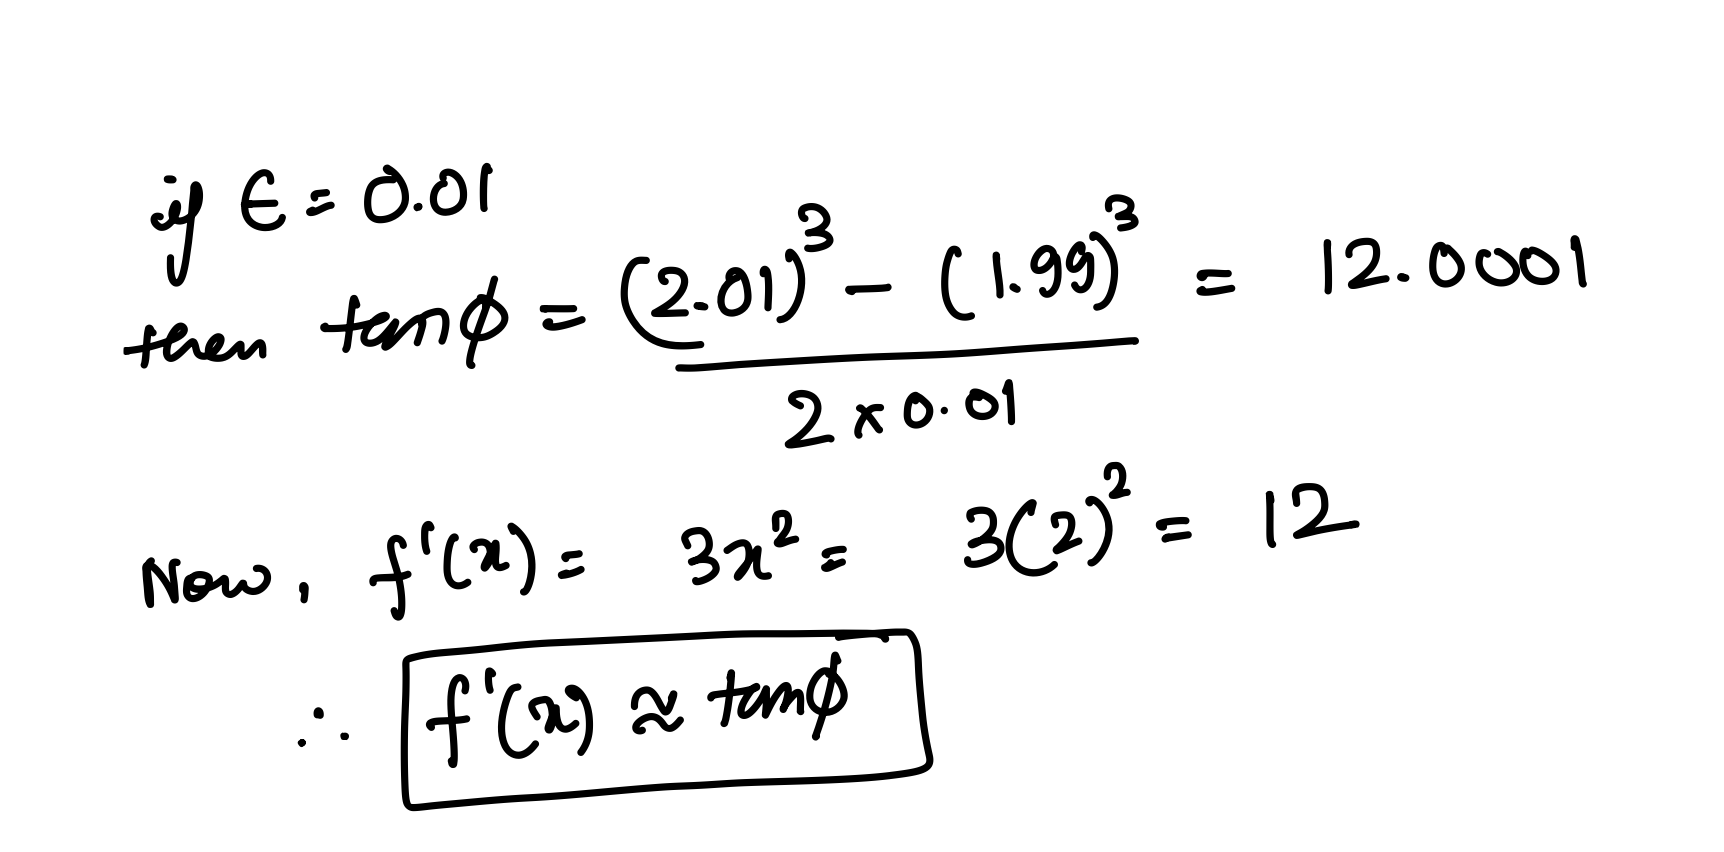

### How to perfrom gradient approximation in Neural Network?
For backpropagation, every layer of the Neural Network has,
- $[w^1, b^1], [w^2, b^2], [w^3, b^3], ..., [w^L, b^L]$.
- Derivative, $[\Delta w^1, \Delta b^1], [\Delta w^2, \Delta b^2], [\Delta w^3, \Delta b^3], ..., [\Delta w^L, \Delta b^L]$.
- Loss is a function of $w^1, b^1, w^2, b^2, w^3, b^3, ..., w^L, b^L$, represented by, $Loss(w^1, b^1, w^2, b^2, w^3, b^3, ..., w^L, b^L)$.

Weights and derivatives are 2D matrices.

A single dimensional vector is created for every layer by unrolling the weights and bias matrix and concatinating such that, $\theta_1 = [w^1, b^1], \theta_2 = [w^2, b^2], \theta_3 = [w^3, b^3], ..., \theta_L = [w^L, b^L]$.

Similarly the derivatives become, $\Delta \theta_1 = [w^1, b^1], \Delta \theta_2 = [w^2, b^2], \Delta \theta_3 = [w^3, b^3], ..., \Delta \theta_L = [w^L, b^L]$.

And the loss becomes, $Loss(\theta_1, \theta_2, ..., \theta_L)$.

$\theta_1, \theta_2, ..., \theta_L$ are concatenated into a single vector $\theta$. Therefore, $\theta = [\theta_1, \theta_2, ..., \theta_L]$.

The loss becomes, $Loss(\theta) = Loss(\theta_1, \theta_2, ..., \theta_L)$.

This is known as gradient checking.

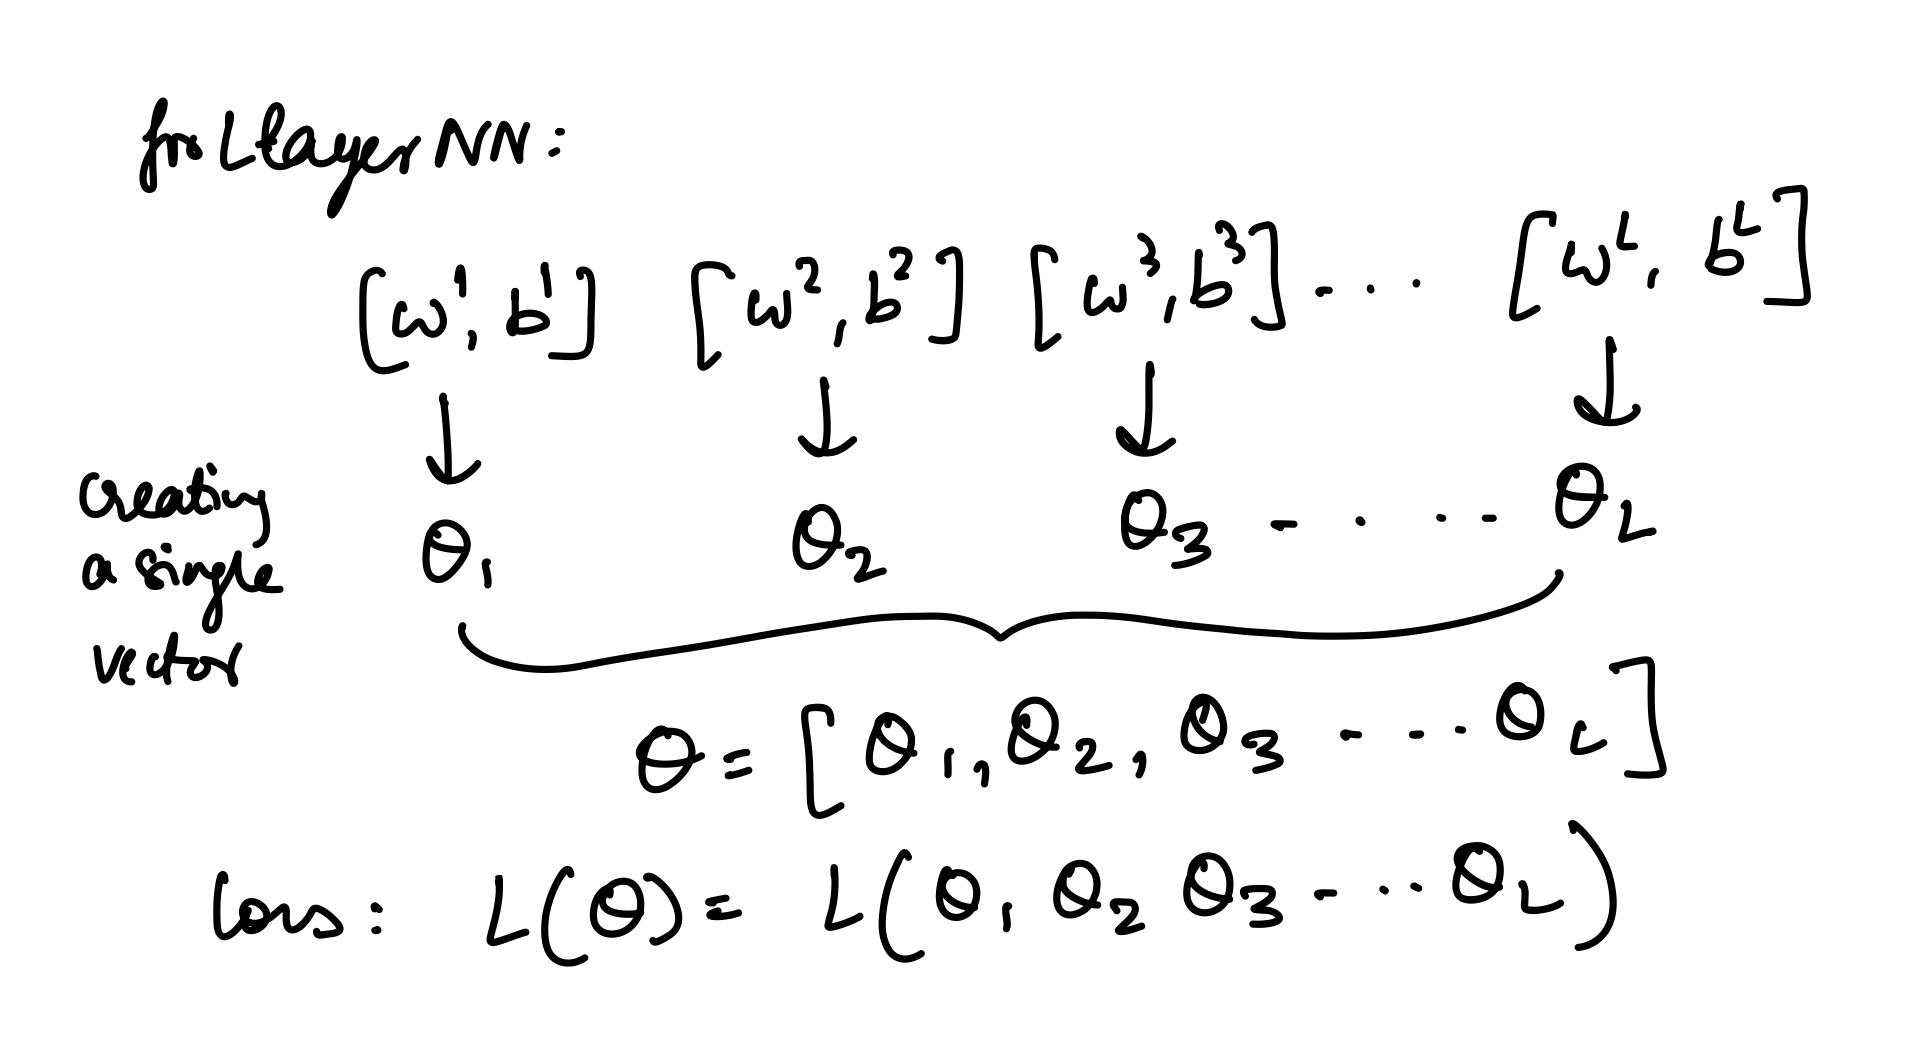

### How to implement gradient checking?
gradient checking is implemented as follows,

For $i$ in range($0$, $len(\theta)$),
- $d\theta_{approx}[i] = \frac{L(\theta_1, \theta_2, \theta_3, ...[\theta_i + \epsilon], ..., \theta_L) - L(\theta_1, \theta_2, \theta_3, ...[\theta_i - \epsilon], ..., \theta_L)}{2 \epsilon}$.

Then check how close,
- $d\theta_{approx}[i] ≈ \frac{\partial L}{\partial θ_i}$.

Note the value of $\epsilon = 10^{-7}$.

### How to evaluate if the difference in approximation and actual gradient is correct or not?
Check the value of $\frac{||d\theta_{approx}[i] - \Delta \theta_{i}||_2}{||d\theta_{approx}[i]||_2 + ||\Delta \theta_i||_2}$, then
- if the value is greater than or equal to $10^{-5}$ there is no issue.
- if the value is lesser than $10^{-5}$ then there is a problem in backpropagation.

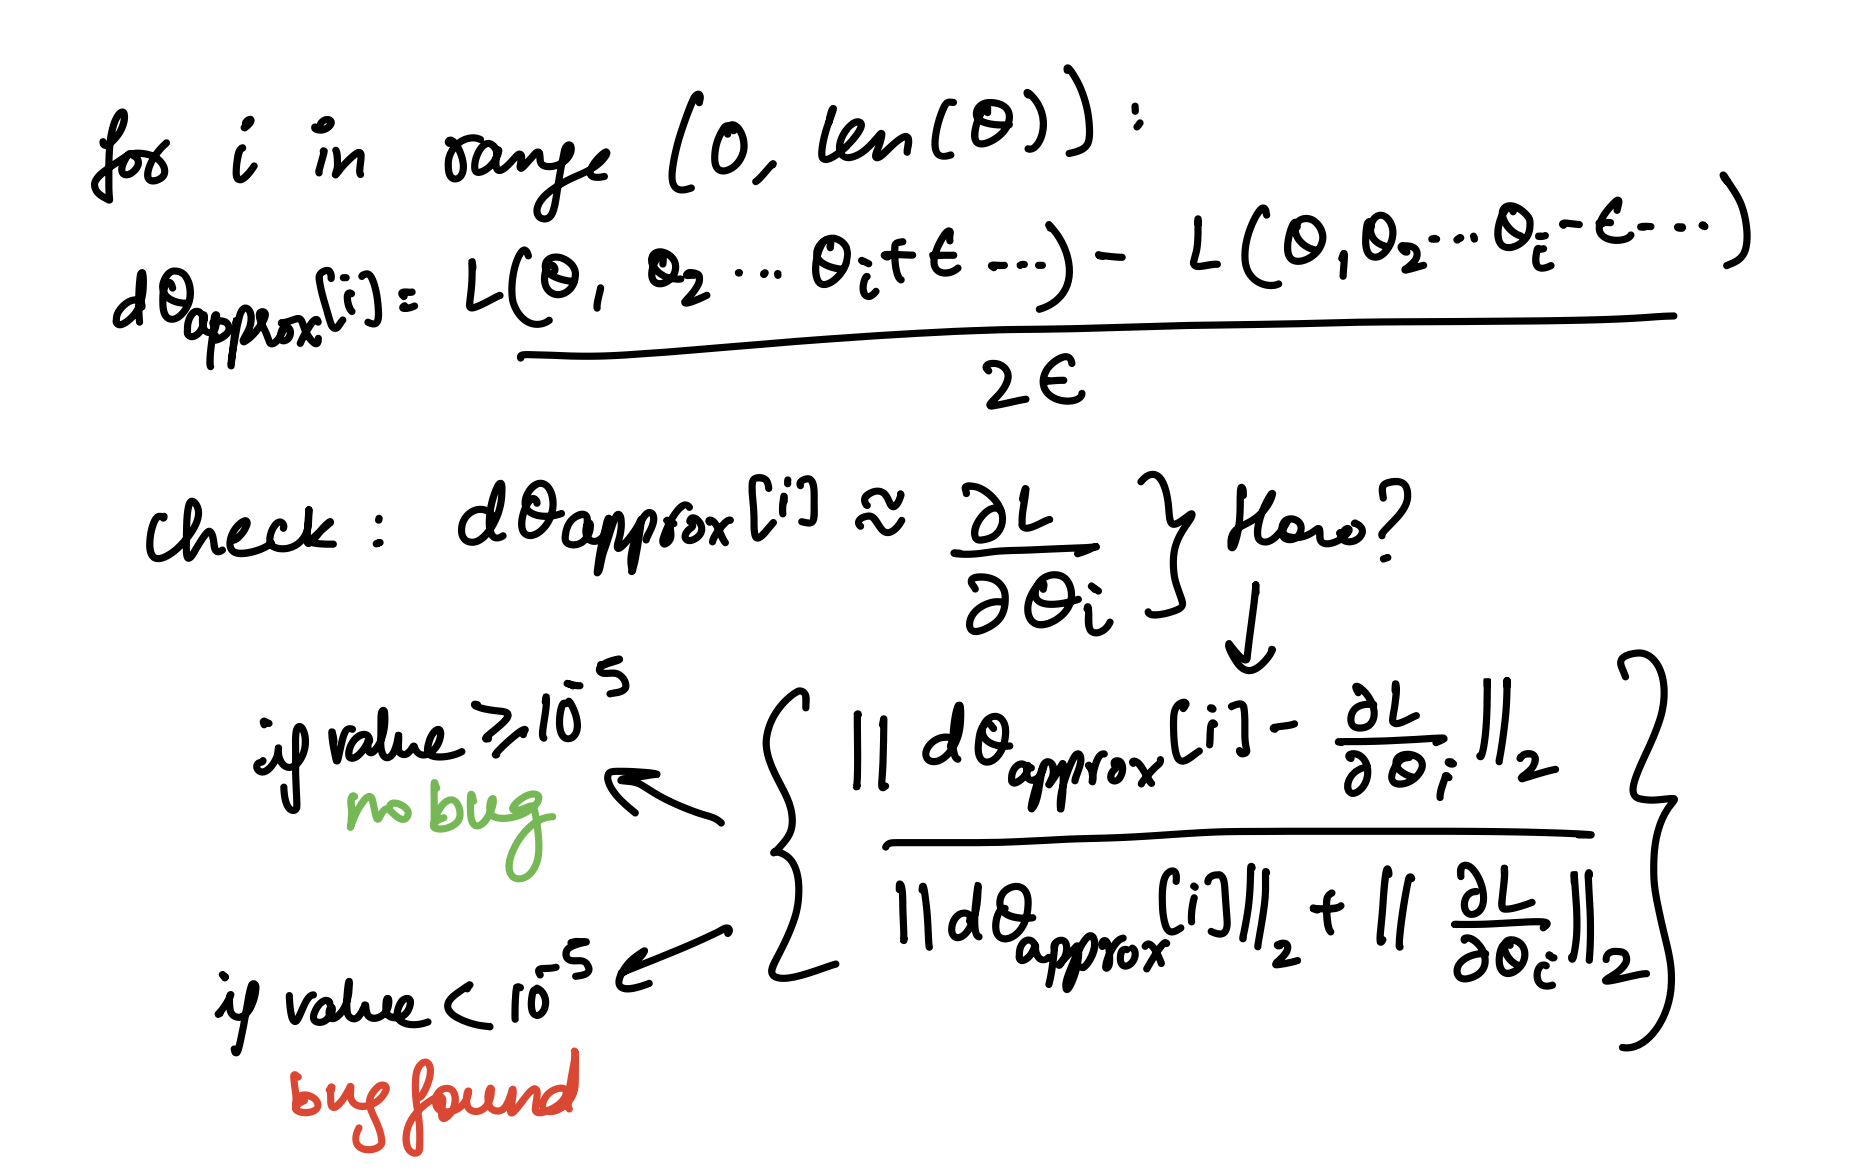

### What to do if the differene in the approximation and actual gradient is really high?
Check the weight $w^k$ and bias $b^k$ (where k is the k-th hidden layer) matrix for which the difference is high, then look for each weight or bias value to detect the bug.

### Should gradient checking be done during training?
No, since gradient checking is time intensive, it can only be performed during debugging only.

### Does gradient checking work with dropout?
No. Dropout drops Neurons randomly in every iteration, this increases the complexity of calculating the gradient of the loss function.

# Single Evaluation Metric
In the model built above, 2 metrics, Precision and Recall were used. The baseline model got a Precision of 44% and Recall of 72%.

Now consider that there is another model, with Precision 50% and Recall of 80%.

### Can it be said that the second model is better than the first one?
No.

### What if F1 Score is used instead?
Consider,
- For model 1, $\frac{2 * 0.44 * 0.72}{0.44 + 0.72} = \frac{0.6336}{1.16} = 0.462$.
- For model 2, $\frac{2 * 0.50 * 0.80}{0.50 + 0.80} = \frac{0.8}{1.3} = 0.615$.

Observe that combining Precision and Recall using F1 Score shows that model 2 performs better than model 1

Therefore, it is always a good practice to use single evaluation metric or combine metrics.

### What if metrics cannot be combined together?
Consider an example of 3 models (A, B and C), such that,

| model | F1 Score | training time |
| :-: | :-: | :-: |
| A | 80% | 100ms |
| B | 92% | 180ms |
| C | 95% | 250ms |

A model with maximum F1 Score and minimum training time is desired. Clearly, training time and F1 Score cannot be combined together.

If a model with maximum F1 score and training time <= 200ms is selected, then model B will be the best model.

### Imagine if there are $n$ metrics which cannot be combined, then what should be done?
Consider 1 metric for which the model is required to have the maximum value in, while conditioning the model on the remaining $n - 1$ metrics. The metric on which the model maximizes itself is called the optimizing metric. The metrics on which the conditions are applied are called statisficing metric.

In other words, when faced with multiple, non-combinable metrics, a common approach is to prioritize one as the primary objective while ensuring the others meet acceptable thresholds.
- Optimizing metrics: This is the primary metric that the model is designed to maximize (e.g., accuracy, profit, user engagement).
- Statisficing metrics: These are the secondary metrics that must meet certain constraints ot minimum requirements (e.g., latency, resource usage, fairness).

This approach allows for a more nuanced evaluation of the model performance, recognizing that maximizing a single metric might come at the expense of the other important factors.

For example, in a recommendation system, the optimizing metric might be user satisfaction (measured by click-through rates or engagement time), while satisficing metrics could include fairness (avoiding bias towards certain user groups) and novelty (recommending diverse items).

By defining and prioritizing these metrics, models that not only perform well on the primary objective but all meet critical constraints can be developed and ensure a more holistic and balanced outcome.

Now that the importance of single evaluation metrics is understood, in the following code, F1 Score is implemented.

Keras does not have F1 score as metric, therefore `tensorflow-addons` will be used for F1 Score.

`pip install tensorflow-addons`.

In [19]:
# import tensorflow
# import tensorflow_addons as tfa

# # using F1 Score as the metric
# model = baseline_model()

# f1 = tfa.metrics.F1Score(4, "micro")

# model.compile(optimizer = tf.keras.optimizers.Adam(), loss = tf.keras.losses.CategoricalCrossentropy(), metrics = [f1])

# # training the model with "epochs = 10" and "batch_size = 128"
# history = model.fit(x_train, y_train, validation_data = (x_val, y_val), epochs = 10, batch_size = 128)

In [20]:
# epochs = history.epoch
# f1_score = history.history["f1_score"]
# val_f1_score = history.history["val_f1_score"]
# plt.plot(epochs, f1_score, label = "Training")
# plt.plot(epochs, val_f1_score, label = "Validation")
# plt.legend()
# plt.title("F1 Score V. Loss")
# plt.show()

Observe that, by joining F1 Score, the model performance is better understood.

With this in mind, the model's performance on the test data can be checked.

In [21]:
from sklearn.metrics import f1_score

y_pred = model.predict(x_test)

# y_test was one hot encoded, y_pred had probabilities
# hence, converting them to labels for multi-class F1 Score calculation
f1_score(np.argmax(y_test.values, axis = 1), np.argmax(y_pred, axis = 1), average = "micro")

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 710us/step


np.float64(0.5014880952380952)

Observe the model has similar results to validation dataset. This is because the distribution of validation and test data is the same.

### Can the results of test and validation set be relied upon?
Consider a scenario, where the validation set has information about Indian customers and the test set has information about American customers. The people in both the countries have different lifestyles and hence, the distributions of both the test and validation set would be obviously different.

### How to get the distributions of the test set and validation set to be the same?
The only way is to make sure that both, validation and test sets, have samples of Indian and American customers.

# Human Level Performance
### If a human F1 Score is 60% and model F1 Score is 49%, does it mean that the model performs well enough?
No. Obviously, it is needed that model's performance is better than human performance.

Keep in mind that, because there is always an irreducible error in the data, no model or human can have 100% performance. The maximum performance possible is called Bayes optimal error.

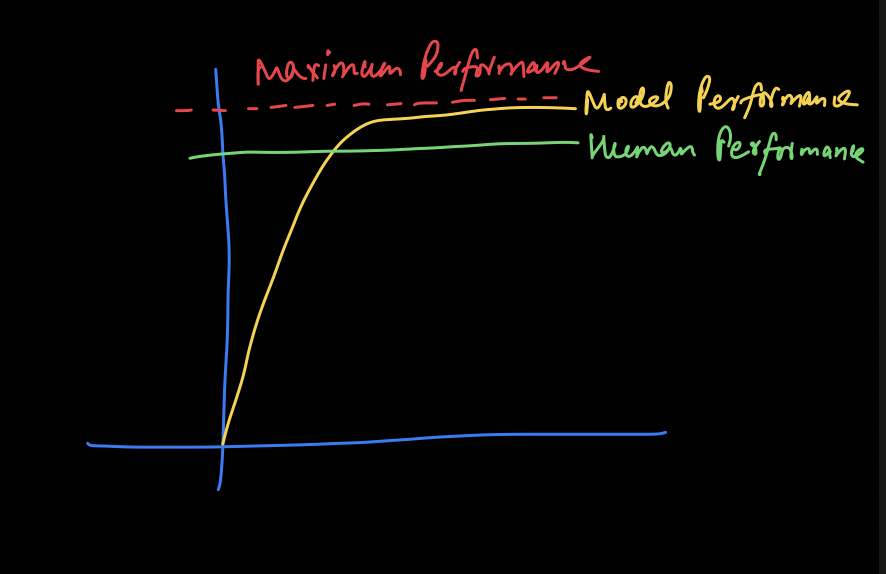

Observe that the model has achieved a F1 Score of 52%.

### Did the model perform well by achieving an F1 Score of 52%?
If the mean model is considered, then F1 Score for 4 classes will approximately be, $\frac{1}{4} * 100 = 25%$. This translates that the model performs quite well on the data.

### What if a human tries to classify and achieves an F1 score of 60%, does it still mean that the model has a good F1 Score?
No. It is always required that the model has high performance on any metric than a human.

Even though the model is better than the mean model, it is always a good practive to compare the model's performance with that of a human's performance.

### Why compare with human's performance?
This is don because humans are efficient at performing tasks and with good accuracy and precision. For example, classifying different brands of cars, voice recognition, etc. Also, it helps in Bias-Variance of the model.

### How human level performance helps in Bias-Variance of the model?
Consider that, there is task at hand to classify Suzuki and Honda cars, say that human error is 1% and the model's training error is 7% and the validation error is 9%.

Now, if only the model's training and validation error was available, the assumption would have been that the model is overfitting, meaning it has high variance and the focus should be on decreasing variance.

But, since there is high gap between human error and model training error, i.e., $7\% - 1\% = 6\%$, shows that the model does not fit the training data well. This means that the model has high bias and focus should be on decreasing bias.

### What if the human error increases to 5.5% and the model error remains the same?
Since the training error and human error are close to each other, this means that the model is fitting well on the training data. At the same time, as the validation error is more than the training error, it means that the model has high variance.

The difference or the gap between human and training error is called Avoidable Bias. Also for this example, human level error is used as a proxy for Bayes optimal error.

### Humans tend to have different errors when performing a task. In such cases, which human error should be considered as Bayes error?
Consider that there is a Brain MRI image to check if the patient has tumor or not. Suppose that,
- A normal human's error is 3%.
- A Doctor's error is 1%.
- A team of expert Doctor's have an error of 0.5%.

In such cases,
- The Doctor's error of 1% should be considered as human level error.
- The team of expert Doctor's with 0.5% error, should be considered as Bayes optimal error.

### Can Bayes optimal error be used as the human level error?
Yes, it can be.

Consider that,
- Human level error = 1%.
- Bayes optimal error = 0.5%.
- Model training error = 0.7% while validation error = 0.8%.

It can be observed in the above example that, the model seems to be performing quite well on the data.

Now if it is desired to further increase the model's performance, Bayes optimal error can be made equal to human level error. To improve the model's performance after this, bias reduction has to be performed before variance reduction.

### Consider that after performing every possible hyperparameter tuning the model's performance improves only slightly. What should be done in such cases?
A maual root cause analysis (RCA) should be performed to find the cause of the error. Such manual analysis is called Error Analysis.

### How to perform Error Analysis?
Error analysis involves a systematic examination of misclassified samples in a machine learning model's validation set. By analyzing the patterns and characteristics of these errors, we can gain valuable insights into the model's strengths and weaknesses.

Key Steps in Error Analysis:
1. Identify Misclassified Samples: Extract the samples from the validation set where the model's prediction does not match the actual ground truth label.
2. Class-wise Error Analysis:
    - Group the misclassified samples by their true class labels.
    - Calculate the number of misclassified samples for each class.
    - This provides a quantitative understanding of the model's performance on different classes.
3. Error Visualization: Create visualizations such as confusion matrices or class-wise error bars to visually represent the distribution of errors across classes.
4. Investigate Error Patterns:
    - Examine the misclassified samples within each class to identify common characteristics or patterns.
    - For example, are certain features consistently causing misclassifications? Are there specific data points that are consistently difficult for the model to classify correctly?
5. Actionable Insights:
    - Use the insights gained from the error analysis to guide model improvement.
    - This may involve:
        - Data Augmentation: Collecting more data for underrepresented or frequently misclassified classes.
        - Feature Engineering: Creating new features or modifying existing ones to better capture relevant information.
        - Model Adjustments: Adjusting hyperparameters, changing the model architecture, or incorporating regularization techniques to improve model robustness.

Consider an example to understand it, say that in the data there are,
- 5 samples of class A.
- 25 samples of class B.
- 60 samples of class C.
- 10 samples of class D.

That are misclassified

The focus in the above case should be on correcting class C, because correcting this would reduce the error by 60%. Apart from correcting class C, correcting the class B can also be parallely worked upon which further reduces the error.

# Multi-Task Learning
### Why Neural Networks work best on complex real world problems?
Suppose that the requirement is to build a model for an autonomous vehicle which in a particular frame checks if the image contains any pedestrians, cars, stop signs and traffic signs.

The ML approach would require to create 4 different models. One each to check pedestrians, cars, stop signs and traffic signs. This is because, Machine Learning is sequential learning and can only identify 1 object at a time. Classifying the image using 4 different model leads to poor perfomance, as no information is shared amongst these models.

In the NN approach, an output layer can be created with 4 different Neurons, each of thm represent an object. A value of 1 means that the object is present and 0 represents the absence of that object. The Neurons share the features from the previous hidden layers and hence solves the issue of information not being shared. This gets the model to perform better.

This is known as Multi-Task Learning.

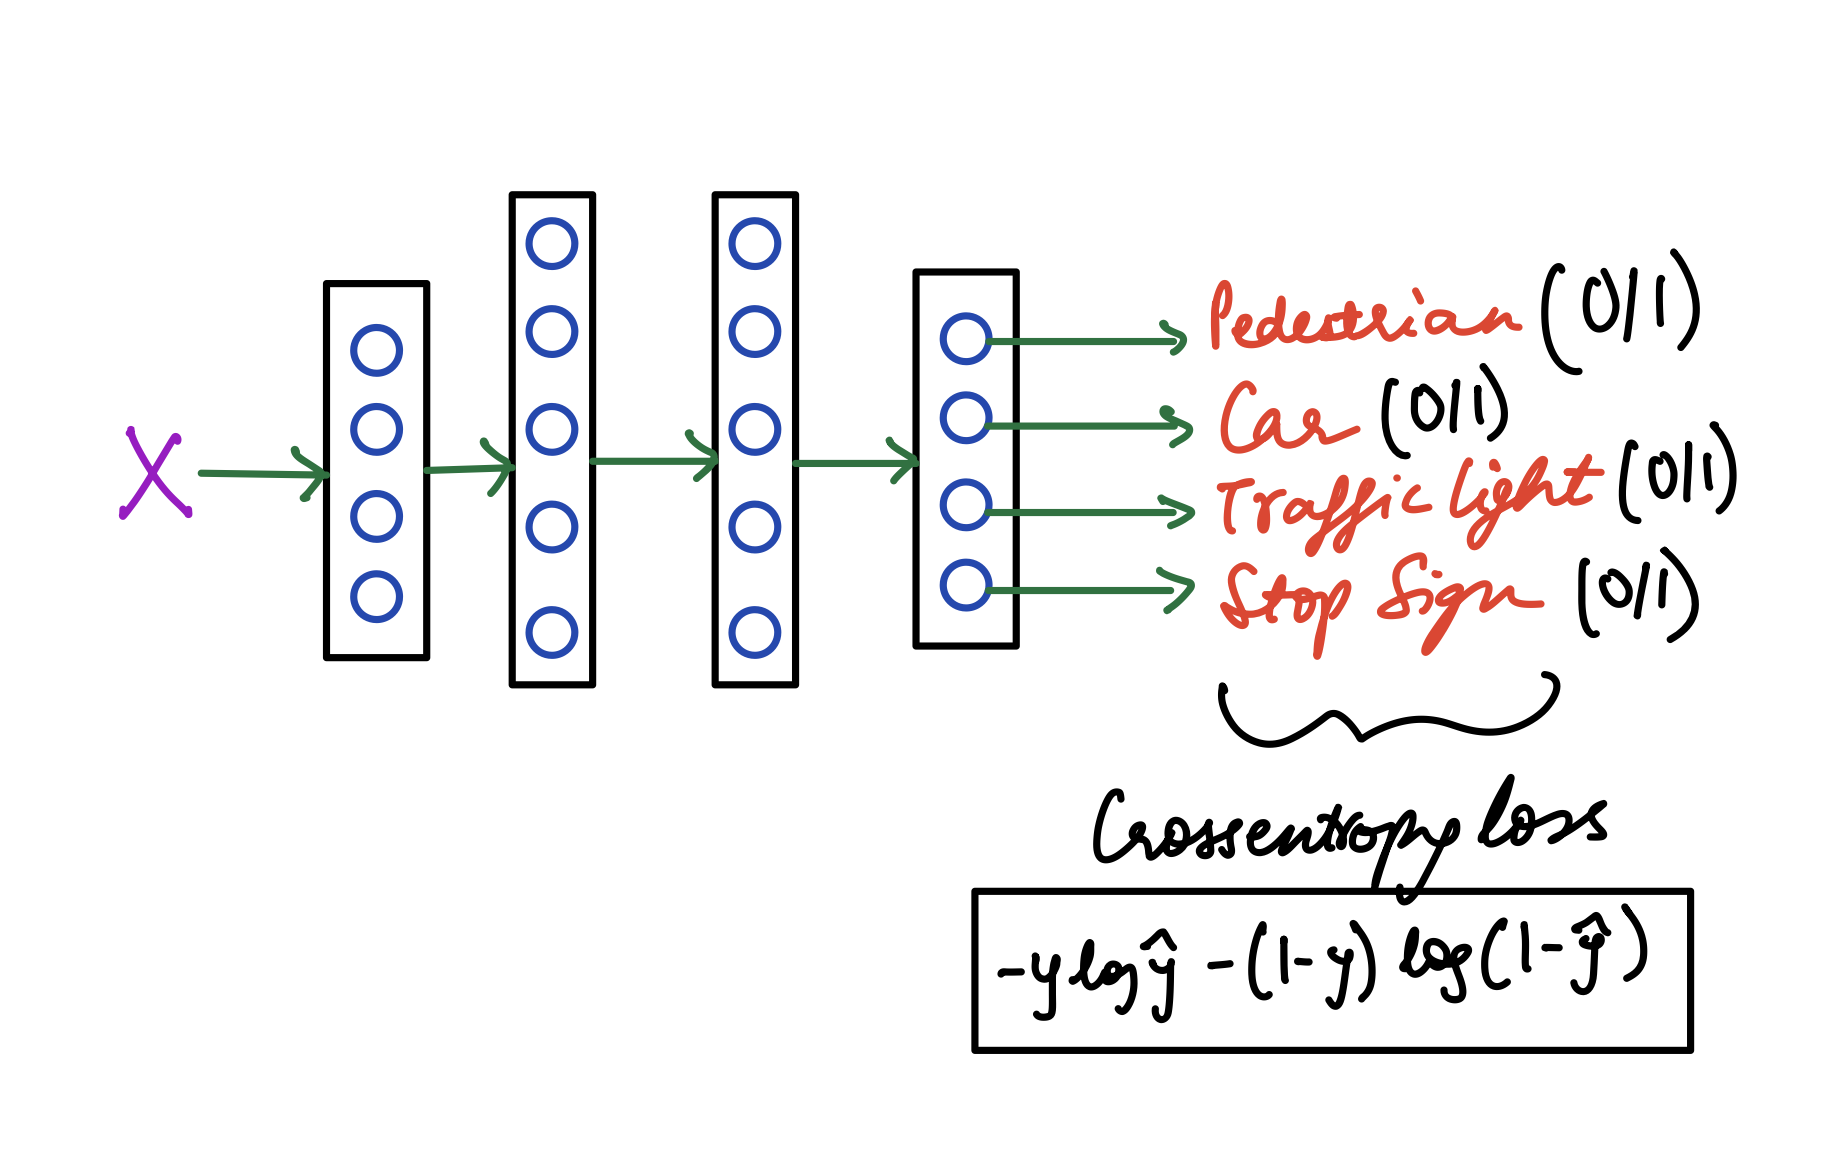

### Why is Softmax not used?
Softmax is useful when there is a need to identify one class over several classes. But in thei case, the requirement is to identify some classes over several classes. Hence, Sigmoid is used with Cross-Entropy as loss function